In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer

## Read Data From File

In [153]:
data = pd.read_csv('../data/training_data.csv', index_col=0)
data.fillna(0, inplace=True)

In [154]:
data.head()

,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
mojombo,1,79,0,1970379,0,0,0,0,2566242,928419,...,0,0,0,0,7758,17442,0,0,0,240167
defunkt,2,1,0,4609687,0,0,0,0,0,470103,...,0,0,0,0,6399,23938,0,0,0,896415
wycats,4,358,0,3378185,0,0,0,0,2687760,952,...,0,0,0,0,21641,441513,0,0,0,3060
brynary,19,3479,0,11661,0,0,0,0,0,951748,...,0,0,0,0,0,17954,0,0,0,3142
kevinclark,20,18,0,0,0,0,0,0,0,43311,...,0,0,0,0,0,0,0,0,0,8688


In [155]:
data.describe()

,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
count,360.000000,360.000000,360.0,3.600000e+02,3.600000e+02,3.600000e+02,3.600000e+02,360.000000,3.600000e+02,3.600000e+02,...,3.600000e+02,3.600000e+02,3.600000e+02,360.000000,3.600000e+02,3.600000e+02,360.000000,360.000000,360.0,3.600000e+02
mean,617.463889,849.200000,0.0,6.685675e+05,2.142649e+05,2.405645e+05,1.479122e+04,5259.402778,8.410996e+05,1.246168e+06,...,1.168651e+04,2.000914e+04,3.513951e+04,42.136111,4.400143e+04,6.915311e+05,13.477778,13.555556,0.0,5.538644e+05
std,379.680600,1227.392149,0.0,3.607739e+06,1.990892e+06,3.090690e+06,1.503894e+05,47386.343385,1.005431e+07,1.111808e+07,...,2.151840e+05,3.501865e+05,5.366843e+05,676.116101,2.918679e+05,9.862117e+06,255.722853,257.198583,0.0,3.042891e+06
min,1.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000e+00
25%,265.750000,40.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,7.915000e+02
50%,624.500000,381.500000,0.0,3.909500e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,4.044000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.474000e+03,0.000000,0.000000,0.0,1.870700e+04
75%,952.000000,1224.250000,0.0,7.351375e+04,3.287500e+02,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.292765e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,7.631500e+03,2.569075e+04,0.000000,0.000000,0.0,1.877255e+05
max,1292.000000,12714.000000,0.0,5.295688e+07,3.382137e+07,5.736992e+07,2.300584e+06,763047.000000,1.851307e+08,1.860555e+08,...,4.082184e+06,6.640060e+06,9.814544e+06,12653.000000,4.753033e+06,1.857201e+08,4852.000000,4880.000000,0.0,4.876602e+07


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, mojombo to cee-dub
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Username       360 non-null    int64
 1   Id             360 non-null    int64
 2   Contributions  360 non-null    int64
 3   JavaScript     360 non-null    int64
 4   Python         360 non-null    int64
 5   Java           360 non-null    int64
 6   C#             360 non-null    int64
 7   PHP            360 non-null    int64
 8   TypeScript     360 non-null    int64
 9   Ruby           360 non-null    int64
 10  C++            360 non-null    int64
 11  C              360 non-null    int64
 12  Swift          360 non-null    int64
 13  Go             360 non-null    int64
 14  Shell          360 non-null    int64
 15  Kotlin         360 non-null    int64
 16  Rust           360 non-null    int64
 17  PowerShell     360 non-null    int64
 18  Objective-C    360 non-null    int64
 19  R  

## Transform Data

#### 1. Make the bytes into percentages

In [157]:
col = ["Id", "Contributions", "JavaScript", "Python", "Java", "C#", "PHP", "TypeScript", "Ruby", "C++", "C", "Swift", "Go", "Shell", "Kotlin", "Rust", "PowerShell", "Objective-C", "R", "MATLAB", "Dart", "Vue", "Assembly", "Sass", "CSS", "HTML", "Pascal", "Racket", "Zig", "Other"]
tcols = [x + '-T' for x in col]
def turn_to_percent(X, columns):
    X[columns] = X[columns].div(X[columns].sum(axis=1), axis=0)
    return X

# Create a FunctionTransformer using the defined function and pass the subset_columns argument
transformer = FunctionTransformer(turn_to_percent, validate=False, kw_args={'columns': col[2:]})

# Apply the transformation to your dataset
data = transformer.transform(data)
data

,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
mojombo,1,79,0,0.343363,0.000000,0.000000,0.0,0.0,0.447199,0.161788,...,0.000000,0.0,0.0,0.0,0.001352,0.003039,0.0,0.0,0.0,0.041852
defunkt,2,1,0,0.718800,0.000000,0.000000,0.0,0.0,0.000000,0.073304,...,0.000000,0.0,0.0,0.0,0.000998,0.003733,0.0,0.0,0.0,0.139780
wycats,4,358,0,0.516904,0.000000,0.000000,0.0,0.0,0.411260,0.000146,...,0.000000,0.0,0.0,0.0,0.003311,0.067557,0.0,0.0,0.0,0.000468
brynary,19,3479,0,0.011735,0.000000,0.000000,0.0,0.0,0.000000,0.957798,...,0.000000,0.0,0.0,0.0,0.000000,0.018068,0.0,0.0,0.0,0.003162
kevinclark,20,18,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.227816,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.045699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
puzza007,1278,1514,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.648198
graham,1282,1062,0,0.454037,0.037289,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.015373,0.003185,0.0,0.0,0.0,0.000298
matehat,1283,1465,0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.002334,...,0.173592,0.0,0.0,0.0,0.000000,0.007441,0.0,0.0,0.0,0.681686
brianm,1291,68,0,0.000000,0.000000,0.938873,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.008408,0.0,0.0,0.0,0.006376


#### 2. Standardize the data using a StandardScaler

In [158]:
scaler = StandardScaler()

data[tcols] = scaler.fit_transform(data[col])
data.head()

,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Dart-T,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T
mojombo,1,79,0,0.343363,0.0,0.0,0.0,0.0,0.447199,0.161788,...,-0.081661,-0.119711,-0.09857,-0.065307,-0.255517,-0.347624,-0.052778,-0.052778,0.0,-0.532505
defunkt,2,1,0,0.718800,0.0,0.0,0.0,0.0,0.000000,0.073304,...,-0.081661,-0.119711,-0.09857,-0.065307,-0.260534,-0.343153,-0.052778,-0.052778,0.0,-0.224008
wycats,4,358,0,0.516904,0.0,0.0,0.0,0.0,0.411260,0.000146,...,-0.081661,-0.119711,-0.09857,-0.065307,-0.227760,0.068537,-0.052778,-0.052778,0.0,-0.662873
brynary,19,3479,0,0.011735,0.0,0.0,0.0,0.0,0.000000,0.957798,...,-0.081661,-0.119711,-0.09857,-0.065307,-0.274668,-0.250684,-0.052778,-0.052778,0.0,-0.654387
kevinclark,20,18,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.227816,...,-0.081661,-0.119711,-0.09857,-0.065307,-0.274668,-0.367230,-0.052778,-0.052778,0.0,-0.520386


#### 3. Determine Number of Clusters

In [159]:
def optimize_kmeans(data, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)
    
    # generate elbow
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k), inertia)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Elbow Method')
    plt.show()

d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

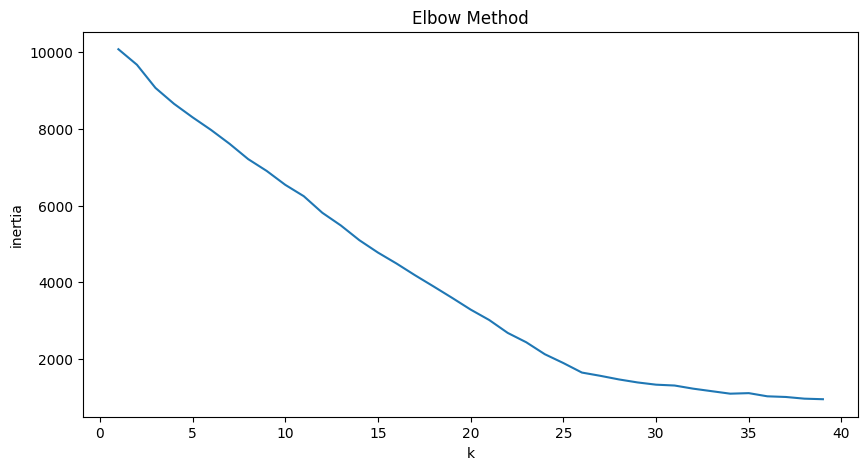

In [160]:
optimize_kmeans(data[tcols], 40)

#### 4 Apply K-Means Clustering

In [161]:
kmeans = KMeans(n_clusters=25, random_state=0).fit(data[tcols])
data['cluster'] = kmeans.labels_
data.head()

d:\aaron\Documents\GitHub\loveatfirsttech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Username,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,...,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T,cluster
mojombo,1,79,0,0.343363,0.0,0.0,0.0,0.0,0.447199,0.161788,...,-0.119711,-0.09857,-0.065307,-0.255517,-0.347624,-0.052778,-0.052778,0.0,-0.532505,5
defunkt,2,1,0,0.718800,0.0,0.0,0.0,0.0,0.000000,0.073304,...,-0.119711,-0.09857,-0.065307,-0.260534,-0.343153,-0.052778,-0.052778,0.0,-0.224008,13
wycats,4,358,0,0.516904,0.0,0.0,0.0,0.0,0.411260,0.000146,...,-0.119711,-0.09857,-0.065307,-0.227760,0.068537,-0.052778,-0.052778,0.0,-0.662873,13
brynary,19,3479,0,0.011735,0.0,0.0,0.0,0.0,0.000000,0.957798,...,-0.119711,-0.09857,-0.065307,-0.274668,-0.250684,-0.052778,-0.052778,0.0,-0.654387,2
kevinclark,20,18,0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.227816,...,-0.119711,-0.09857,-0.065307,-0.274668,-0.367230,-0.052778,-0.052778,0.0,-0.520386,6


## Write to File

In [162]:
with open('../data/kmeansmodel.pkl', 'wb') as f:
    pickle.dump(kmeans, f)